# Truncated Skewed Levy Distribution

In [1]:
from levy_distribution import pdf_from_cf, dump_levy, load_levy, histo_fit_levy, fit_levy
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy.stats import norm
import pandas as pd

In [ ]:
mu = 0.0
c = 1
alpha = 0.656
lam = 0.8
beta = -0.226

## Evaluate at some points

In [ ]:
x= [0.2, 2, -1]
pdf_from_cf(x,mu,c,alpha,lam,beta)

## Make a plot
Takes around 4 seconds for 1000 points

In [ ]:
x_values = np.linspace(-10, 10, 1000)
start_time = time.time()
y_values = pdf_from_cf(x_values, mu, c, alpha, lam, beta, k_max=25.0, ln_2_k_points=14, x_lim=250)
print("It took %s seconds for 1000 evaluations" % (time.time() - start_time))
# It takes 4 seconds for 1000 evaluations

pdf_gaussian = norm.pdf(x_values, loc=mu, scale=c)
# Plot the resulting PDF:
plt.figure(figsize=(7, 5))
plt.plot(x_values, y_values, label='Truncated Lévy')
plt.plot(x_values, pdf_gaussian, label='Gaussian')

plt.title("Truncated Lévy vs Gaussian PDF")
plt.xlabel("x")
plt.ylabel("pdf(x)")
plt.legend()
plt.grid(True)
plt.show()

## Dump the data points to a file
Takes 40 seconds for 10000 points

In [ ]:
path = dump_levy(mu,c,alpha, lam, beta, x_min=-15, x_max=15, x_points=10000, filename='data/my_levy', k_max=15, ln_2_k_points=12)

## Reload the saved data points
This will give a scipy.stats distribution for the fixed parameters, which allows for various operations, like evaluating moments and also sampling

In [ ]:
filename = 'data/my_levy_' + str(np.round(mu,2)) + '_' +  str(np.round(c,2)) + '_' +   str(np.round(alpha,2)) + '_' +   str(np.round(lam,2)) + '_' +   str(np.round(beta,2))+'.npz'

my_levy = load_levy('data/my_levy_0.0_1_0.67_0.84_-0.28.npz')

Sample from the distribution, and plot the histogram

In [ ]:
sample = my_levy.rvs(size = 1000)

In [ ]:
plt.figure(figsize=(7, 5))
plt.hist(sample, bins=30, density=True)
plt.plot(x_values, y_values, label='Truncated Lévy')
plt.title("Truncated Lévy")
plt.xlabel("x")
plt.ylabel("pdf(x)")
plt.legend()
plt.show()

## Real data

In [2]:
dfs = pd.read_excel('../Indices_Data.xlsx', sheet_name=None)

euronext100 = dfs['Euronext100'][['Date', 'Close']]
stoxx50e = dfs['Stoxx50E'][['Date', 'Close']]
snp500 = dfs['S&P500'][['Date', 'Close']][18000:]
data = snp500.copy()

data['Returns'] = data['Close'].dropna().pct_change()

std_dev = data['Returns'].std()
mean = data['Returns'].mean()
data['Scaled Returns'] = (data['Returns']-mean)/std_dev

In [ ]:
plt.figure(figsize=(7, 5))
plt.hist(data['Scaled Returns'], range=(-5, 5), bins=30, density=True, color='green')
plt.hist(sample,range=(-5, 5), bins=30, density=True, alpha=0.5, color='red')
plt.plot(x_values, y_values, label='Truncated Lévy', color='red')
plt.title("Truncated Lévy: " + str(np.round(mu,2)) + ' ' +  str(np.round(c,2)) + ' ' +   str(np.round(alpha,2)) + ' ' +   str(np.round(lam,2)) + ' ' +   str(np.round(beta,2))
)
plt.show()

## Fit the PDF

In [ ]:
n_points = 57
alpha_grid = np.linspace(0.65,0.81,n_points)
lam_grid = np.linspace(1.8,4.10,n_points)
beta_grid = np.linspace(-0.29,-0.45,n_points)

opt = histo_fit_levy(data['Scaled Returns'],alpha_grid=alpha_grid, lam_grid=lam_grid, beta_grid=beta_grid , n_bins = 30, k_max=15.0, ln_2_k_points=12)

In [23]:
x_values = np.linspace(-5, 5, 1000)
start_time = time.time()
y_values = pdf_from_cf(x_values, 0, 1, opt[0], opt[1], opt[2], k_max=15.0, ln_2_k_points=12, x_lim=25)
print("It took %s seconds for 1000 evaluations" % (time.time() - start_time))

It took 0.5808632373809814 seconds for 1000 evaluations


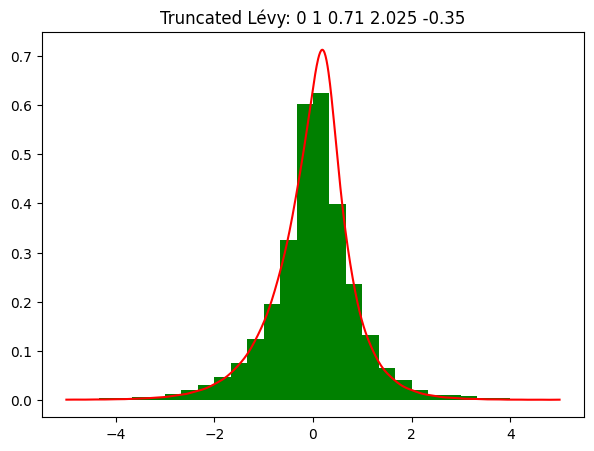

In [24]:
plt.figure(figsize=(7, 5))
plt.hist(data['Scaled Returns'], range=(-5, 5), bins=30, density=True, color='green')
plt.plot(x_values, y_values, label='Truncated Lévy', color='red')
plt.title("Truncated Lévy: " + str(np.round(0,2)) + ' ' +  str(np.round(1,2)) + ' ' +   str(np.round(opt[0],3)) + ' ' +   str(np.round(opt[1],3)) + ' ' +   str(np.round(opt[2],3))
)
plt.show()

In [3]:
initial_guess = np.array([0.69, 2, -0.34])
result = fit_levy(data['Scaled Returns'], initial_guess, k_max=15.0, ln_2_k_points=12)

C:\Users\leocr\Projects\Economics\.venv\Lib\site-packages\scipy\optimize\_optimize.py:851: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
